# HW 13 - Quantum Mechanics II

### Name: Mohamed Gamal Zaid
### ID: 201700399

In [2]:
import numpy as np
from numpy.random import randint as rand
import matplotlib.pyplot as plt
import time
from scipy.integrate import odeint
from matplotlib.pyplot import cm
import random

# Matching Method

$$\psi_{n+1}=2\psi_n - \psi_{n-1}-2(\Delta x)^2(E-V_n)\psi_n$$

# Figure 10.8

In [3]:

l=6
E=-1.5
dE = 0.4
b = 2
dx = 0.01
x=np.round(np.arange(0.01,l,dx),3)
lx = x.size

V = np.zeros(lx)
epsilon = 10
sigma = 1
for i in range(lx):
    V[i] = 4*epsilon*(np.power(sigma/x[i],12) - np.power(sigma/x[i], 6))

xmatch = np.where(V==np.min(V))[0][0]
#xmatch = np.where(x==1.4)[0][0]

xL=0.5
xR=5

xLloc = np.where(x==xL)[0][0]
xRloc = np.where(x==xR)[0][0]


def PSIL(psi,loc, E):
    psi[xLloc]=0
    
    psi[xLloc-1]=-0.0001*dx

    for i in range(xLloc, lx-1):
        psi[i+1]=2* psi[i] - psi[i-1] - 2 * np.power(dx,2)*(E-V[i])*psi[i]
    return psi


def PSIR(psi, loc, E):
    psi[xRloc]=0
    psi[xRloc-1]=-0.0001*dx

    psiTemp = np.flip(psi[0:xRloc+1])
    VTemp = np.flip(V[0:xRloc+1])
        
    psiTemp[0]=0
    psiTemp[1]=+0.0001*dx
    
    for i in range(1,xRloc-1):
        psiTemp[i+1]=2* psiTemp[i] - psiTemp[i-1] - 2 * np.power(dx,2)*(E-VTemp[i])*psiTemp[i]

    psi[0:xRloc+1]=np.flip(psiTemp)
    return psi


matchLast = 0

c=0
fig = plt.figure()
old_dE = 0
while(np.abs(dE) >0.000000000001):
    psiL = np.zeros(lx)
    psiR = np.zeros(lx)

    psiL = PSIL(psiL, xLloc, E)    
    psiR = PSIR(psiR, xRloc, E)    

    #if psiR[xmatch]: print(psiR[xmatch])
    if psiL[xmatch-1] < psiR[xmatch+1]:
        matchNew = -1
    else:
        matchNew = 1
    if matchNew != matchOld:
        dE = -dE/2
    
    E += dE
#     if dE != old_dE:
#         print(E, dE)
#         old_dE = dE
    matchLast = matchNew

plt.figure()
plt.title("Figure 10.8 without scaling")
plt.plot(x,V)
plt.plot(x[xLloc:xmatch+10],psiL[xLloc:xmatch+10],lw=5, label=r"$\psi_L$")
plt.plot(x[xmatch-10:xRloc],psiR[xmatch-10:xRloc], label=r"$\psi_R$")
plt.ylim(-0.5,0.5)
plt.xlim(0.5,3)
plt.xlabel('x')
plt.ylabel(r'$\psi$')
plt.legend()
plt.grid(alpha=0.2)

print("E=", E)

plt.figure()
psiL/=np.max(psiL)
ratio=psiL[xmatch]/psiR[xmatch]
psiR*=ratio

plt.title("Figure 10.8 after scaling")

plt.plot(x,V)
plt.plot(x[xLloc:xmatch+10],psiL[xLloc:xmatch+10],lw=5, label=r"$\psi_L$")
plt.plot(x[xmatch-10:xRloc],psiR[xmatch-10:xRloc], label=r"$\psi_R$")
plt.ylim(-2,2)
plt.xlim(0.5,3)
plt.xlabel('x')
plt.ylabel(r'$\psi$')
plt.legend()
plt.grid(alpha=0.2)

NameError: name 'matchOld' is not defined

<Figure size 432x288 with 0 Axes>

# Figure 10.9

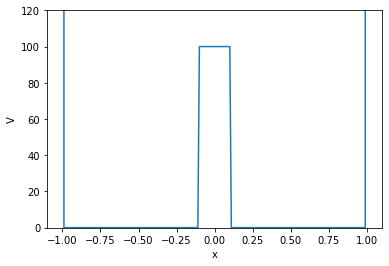

In [349]:
l=1
E=-1.5
dE = 0.4
b = 2
dx = 0.01
x=np.round(np.arange(-l,l+dx,dx),3)
lx = x.size

V = np.zeros(lx)
VOutside = 100000
VCenter = 100
width = 0.2
for i in range(lx):
    if x[i]<=-l or x[i]>=l: V[i]=VOutside
    if x[i]<=0.1 and x[i]>=-0.1: V[i]=VCenter
plt.plot(x,V)
plt.ylim(-0.1,120)
plt.xlabel('x')
plt.ylabel('V')
print()

# Figure 10.11: Even Solutions for Square Well with Barrier using Matching Method

Guessed E= 4 and Obtained E= 3.8666666666664242
Guessed E= 5 and Obtained E= 4.866666666666424
Guessed E= 7 and Obtained E= 5.066666666666457


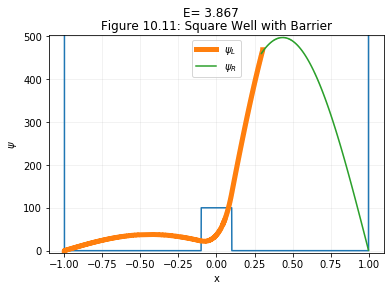

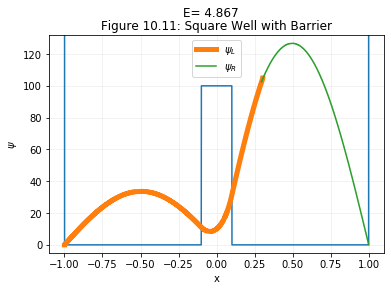

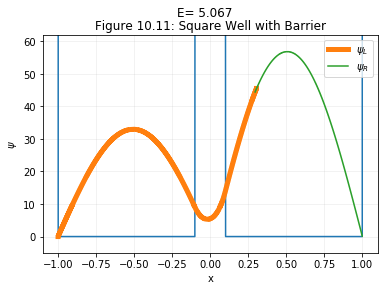

In [424]:
E_guesses = np.array([4,5,7])
for q in range(len(E_guesses)):
    l=2
    E=E_guesses[q]
    dE = 0.4
    b = 2
    dx = 0.0005
    x=np.round(np.arange(-l,l+dx,dx),3)
    lx = x.size

    V = np.zeros(lx)
    VOutside = 100000
    VCenter = 100
    width = 0.2
    for i in range(lx):
        if x[i]<=-1 or x[i]>=1: V[i]=VOutside
        if x[i]<=0.1 and x[i]>=-0.1: V[i]=VCenter


    #xmatch = np.where(V==np.min(V))[0][0]
    xmatch = np.where(x==0.3)[0][0]

    xL=-1
    xR=1

    xLloc = np.where(x==xL)[0][0]
    xRloc = np.where(x==xR)[0][0]


    def PSIL(psi,loc, E):
        psi[xLloc]=0

        psi[xLloc-1]=-0.0001*dx

        for i in range(xLloc, lx-1):
            psi[i+1]=2* psi[i] - psi[i-1] - 2 * np.power(dx,2)*(E-V[i])*psi[i]
        return psi


    def PSIR(psi, loc, E):
        psi[xRloc]=0
        psi[xRloc-1]=-0.0001*dx

        psiTemp = np.flip(psi[0:xRloc+1])
        VTemp = np.flip(V[0:xRloc+1])

        psiTemp[0]=0
        psiTemp[1]=+0.0001*dx

        for i in range(1,xRloc-1):
            psiTemp[i+1]=2* psiTemp[i] - psiTemp[i-1] - 2 * np.power(dx,2)*(E-VTemp[i])*psiTemp[i]

        psi[0:xRloc+1]=np.flip(psiTemp)
        return psi


    matchLast = 0

    c=0
    old_dE = 0
    while(np.abs(dE) >0.000000000001):
        psiL = np.zeros(lx)
        psiR = np.zeros(lx)

        psiL = PSIL(psiL, xLloc, E)    
        psiR = PSIR(psiR, xRloc, E)    

        #if psiR[xmatch]: print(psiR[xmatch])
        if psiL[xmatch-1] < psiR[xmatch+1]:
            matchNew = -1
        else:
            matchNew = 1
        if matchNew != matchOld:
            dE = -dE/2

        E += dE
    #     if dE != old_dE:
    #         print(E, dE)
    #         old_dE = dE
        matchLast = matchNew

    psiL *=1000000
    psiR *=1000000
    #RSum = np.sum(psiR)
    #if RSum: psiR = psiR/RSum*1000

    ratio=psiL[xmatch]/psiR[xmatch]
    psiR*=ratio

    plt.figure()
    plt.title("Figure 10.11: Square Well with Barrier")

    plt.plot(x,V)
    plt.plot(x[xLloc:xmatch+10],psiL[xLloc:xmatch+10],lw=5, label=r"$\psi_L$")
    plt.plot(x[xmatch-10:xRloc],psiR[xmatch-10:xRloc], label=r"$\psi_R$")
    plt.xlabel('x')
    plt.ylabel(r'$\psi$')
    plt.legend()
    plt.suptitle("E= "+str(np.round(E,3)))
    plt.grid(alpha=0.2)
    plt.ylim(-5+np.min([np.min(psiL[xLloc:xmatch+10]),np.min(psiR[xmatch-10:xRloc])]),5+np.max([np.max(psiL[xLloc:xmatch+10]),np.max(psiR[xmatch-10:xRloc])]))
    plt.xlim(-1.1,1.1)
    print("Guessed E= "+str(E_guesses[q])+" and Obtained E= "+str(E))

# Figure 10.12 : Odd Solutions for Square Well with Barrier using Matching Method

Guessed E= 0.1 and Obtained E= 5.566666666666425
Guessed E= 2.0 and Obtained E= 5.466666666666424
Guessed E= 6.0 and Obtained E= 5.866666666666424


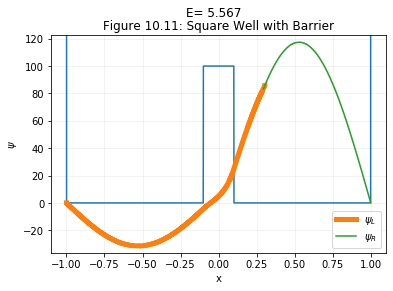

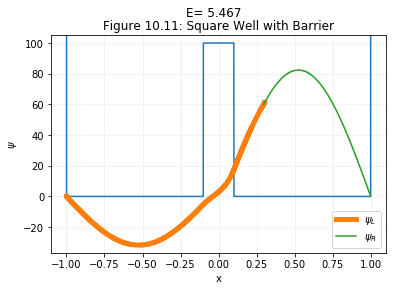

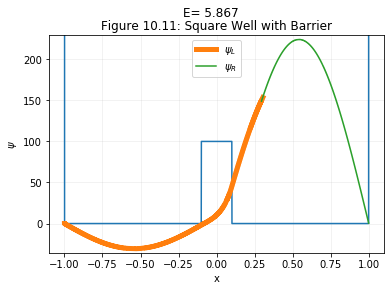

In [442]:
E_guesses = np.array([0.1, 2, 6])
#E_guesses = np.arange(0,10,0.1)
#E_guesses = [6]
for q in range(len(E_guesses)):
    l=2
    E=E_guesses[q]
    dE = 0.4
    b = 2
    dx = 0.0005
    x=np.round(np.arange(-l,l+dx,dx),3)
    lx = x.size

    V = np.zeros(lx)
    VOutside = 100000
    VCenter = 100
    width = 0.2
    for i in range(lx):
        if x[i]<=-1 or x[i]>=1: V[i]=VOutside
        if x[i]<=0.1 and x[i]>=-0.1: V[i]=VCenter


    #xmatch = np.where(V==np.min(V))[0][0]
    xmatch = np.where(x==0.3)[0][0]

    xL=-1
    xR=1

    xLloc = np.where(x==xL)[0][0]
    xRloc = np.where(x==xR)[0][0]


    def PSIL(psi,loc, E):
        psi[xLloc]=0

        psi[xLloc-1]=-0.0001*dx

        for i in range(xLloc, lx-1):
            psi[i+1]=2* psi[i] - psi[i-1] - 2 * np.power(dx,2)*(E-V[i])*psi[i]
        return psi


    def PSIR(psi, loc, E):
        psi[xRloc]=0
        psi[xRloc-1]=-0.0001*dx

        psiTemp = np.flip(psi[0:xRloc+1])
        VTemp = np.flip(V[0:xRloc+1])

        psiTemp[0]=0
        psiTemp[1]=+0.0001*dx

        for i in range(1,xRloc-1):
            psiTemp[i+1]=2* psiTemp[i] - psiTemp[i-1] - 2 * np.power(dx,2)*(E-VTemp[i])*psiTemp[i]

        psi[0:xRloc+1]=np.flip(psiTemp)
        return psi


    matchLast = 0

    c=0
    old_dE = 0
    while(np.abs(dE) >0.000000000001):
        psiL = np.zeros(lx)
        psiR = np.zeros(lx)

        psiL = PSIL(psiL, xLloc, E)    
        psiR = PSIR(psiR, xRloc, E)    
        
        psiL = -psiL
        #if psiR[xmatch]: print(psiR[xmatch])
        if psiL[xmatch-1] < psiR[xmatch+1]:
            matchNew = -1
        else:
            matchNew = 1
        if matchNew != matchOld:
            dE = -dE/2

        E += dE
#         if dE != old_dE:
#             print(E, dE)
#             old_dE = dE
        matchLast = matchNew
        if E>20 or E<-20:
            print("We broke for the guess "+str(E_guesses[q]))
            break;

    psiL *=1000000
    psiR *=1000000
    #RSum = np.sum(psiR)
    #if RSum: psiR = psiR/RSum*1000

    ratio=psiL[xmatch]/psiR[xmatch]
    psiR*=ratio

    plt.figure()
    plt.title("Figure 10.11: Square Well with Barrier")

    plt.plot(x,V)
    plt.plot(x[xLloc:xmatch+10],psiL[xLloc:xmatch+10],lw=5, label=r"$\psi_L$")
    plt.plot(x[xmatch-10:xRloc],psiR[xmatch-10:xRloc], label=r"$\psi_R$")
    plt.xlabel('x')
    plt.ylabel(r'$\psi$')
    plt.legend()
    plt.suptitle("E= "+str(np.round(E,3)))
    plt.grid(alpha=0.2)
    plt.ylim(-5+np.min([np.min(psiL[xLloc:xmatch+10]),np.min(psiR[xmatch-10:xRloc])]),5+np.max([VCenter,np.max([np.max(psiL[xLloc:xmatch+10]),np.max(psiR[xmatch-10:xRloc])])]))
    plt.xlim(-1.1,1.1)
    print("Guessed E= "+str(E_guesses[q])+" and Obtained E= "+str(E))